<a href="https://colab.research.google.com/github/diogoruivo47/Data-Mining/blob/main/FS_Dimension_reductionality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

remove outliers before normalization


Have you missed some outliers?
Are there still missing values?
Is the data normalized?

In [139]:
pip install umap-learn

In [140]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import umap


df = pd.read_csv('num_UMAP_df.csv')
df2 = pd.read_csv('cat_UMAP_df.csv')

In [141]:
df

,Unnamed: 0,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk
0,0,18,2,5,1,0,1,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,28.88,14.44,2.5,1.000000,90,2,1,0.0,0.010989,0.250000,0.020362,0.092846,0,0,0,0,2,0
1,1,17,2,2,2,0,1,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,2,19.21,9.60,1.0,1.000000,90,2,2,0.0,0.010989,0.250000,0.013544,0.090596,0,0,2,0,0,0
2,2,38,1,2,2,0,1,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,9.20,4.60,1.0,1.000000,90,2,1,0.5,0.010989,0.250000,0.006487,0.088267,0,0,2,0,0,0
3,3,27,2,3,1,0,2,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2,31.56,15.78,1.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.022252,0.066010,0,0,1,1,0,0
4,4,20,2,5,0,0,2,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,55.44,27.72,2.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.039088,0.071566,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,30,1,1,1,91,91,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,1,0,0
31871,31884,27,1,1,0,91,91,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,0,1,0
31872,31885,24,1,1,1,91,91,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,17.79,17.79,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012543,0.416639,0,1,0,0,0,0
31873,31886,34,1,1,0,91,91,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,12.03,12.03,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.008482,0.415299,0,0,1,0,0,0


In [142]:
# df_normalized = df_normalized.drop(columns=['Unnamed: 0'])


# dropping HR 0-23 for grouped columns for time of day,

# first & last order are taken in recency column so dropped

# By order percentage:

# High (>30%): Asian, American
# Medium (10-30%): OTHER, Italian, Japanese
# Low (<10%): remaining cuisines

# By Customer Lifetime Value (CLV) Score:

# High CLV (0.3-0.5)
# Medium CLV (0.2-0.3)
# Low CLV (0.0-0.2)

# By Age Group:

# <18
# 18-24
# 25-34
# 35-44
# 45-54
# 55+

# By Loyalty Rank:

# High (4.0 - 8.0)
# Medium (2.0 - 4.0)
# Low (0.0 - 2.0)

import pandas as pd

# Assuming df is your original DataFrame
df_copy = df.copy()

# Define columns to drop
columns_to_drop = ['HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7',
                   'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14',
                   'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21',
                   'HR_22', 'HR_23', 'first_order', 'last_order', 'customer_age']

# # CLV Score
# df['CLV_Group'] = pd.cut(df['CLV_Score'], bins=[0, 0.2, 0.3, 0.5], labels=['Low', 'Medium', 'High'])


# # Loyalty Rank
# df['Loyalty_Group'] = pd.cut(df['Loyalty_Rank'], bins=[0, 2, 4, 8], labels=['Low', 'Medium', 'High'])

# , 'CUI_Asian', 'CUI_American', 'CUI_OTHER', 'CUI_Italian', 'CUI_Japanese', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese',
                    #  'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Noodle_Dishes',
                    #  'CUI_Street_Food/Snacks', 'CUI_Thai'

# # Define cuisine groups
# high_freq_cuisines = ['CUI_Asian', 'CUI_American']
# medium_freq_cuisines = ['CUI_OTHER', 'CUI_Italian', 'CUI_Japanese']
# low_freq_cuisines = ['CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken_Dishes', 'CUI_Chinese',
#                      'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Noodle_Dishes',
#                      'CUI_Street_Food/Snacks', 'CUI_Thai']

# # Create Age Group column
df_copy['Age_Group'] = pd.cut(df_copy['customer_age'], bins=[0, 18, 24, 34, 44, 54, 100], labels=['<18', '18-24', '25-34', '35-44', '45-54', '55+'])

# # Create a new column 'cuisine_group'
# def assign_cuisine_group(row):
#     if any(row[col] == 1 for col in high_freq_cuisines):
#         return '1'
#     elif any(row[col] == 1 for col in medium_freq_cuisines):
#         return '2'
#     else:
#         return '3'

# df_copy['cuisine_group'] = df_copy.apply(assign_cuisine_group, axis=1)

# Drop the specified columns
df_grouped = df_copy.drop(columns=columns_to_drop)

df_grouped

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group
0,0,2,5,1,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,28.88,14.44,2.5,1.000000,90,2,1,0.0,0.010989,0.250000,0.020362,0.092846,0,0,0,0,2,0,<18
1,1,2,2,2,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,19.21,9.60,1.0,1.000000,90,2,2,0.0,0.010989,0.250000,0.013544,0.090596,0,0,2,0,0,0,<18
2,2,1,2,2,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,9.20,4.60,1.0,1.000000,90,2,1,0.5,0.010989,0.250000,0.006487,0.088267,0,0,2,0,0,0,35-44
3,3,2,3,1,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,31.56,15.78,1.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.022252,0.066010,0,0,1,1,0,0,25-34
4,4,2,5,0,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,55.44,27.72,2.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.039088,0.071566,0,0,2,0,0,0,18-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,1,0,0,25-34
31871,31884,1,1,0,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,0,1,0,25-34
31872,31885,1,1,1,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,17.79,17.79,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012543,0.416639,0,1,0,0,0,0,18-24
31873,31886,1,1,0,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,12.03,12.03,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.008482,0.415299,0,0,1,0,0,0,25-34


In [143]:

# By Customer Region (Order %):

# Regions: 8670, 4660, 2360
# Order % Range: 27.7% to 30.62%

# Regions: 2440, 4140, 8370, 8550
# Order % Range: 0,04 to 4.65%

# Define the regions (as strings)
main_regions = ['8670', '4660', '2360']
other_regions = ['2440', '4140', '8370', '8550']

# Create new columns for main regions
for region in main_regions:
    df2[f'Region_{region}'] = (df2['customer_region'] == region).astype(int)

# Create a single column for other regions
df2['Region_Other'] = (df2['customer_region'].isin(other_regions)).astype(int)

# If the customer_region contains a string like 'Region_8670',
# extract the numeric part:
df2['Region_Numeric'] = df2['customer_region'].str.extract('(\d+)')

# Now use the numeric region for comparison
for region in main_regions:
    df2[f'Region_{region}'] = (df2['Region_Numeric'] == region).astype(int)

df2['Region_Other'] = (df2['Region_Numeric'].isin(other_regions)).astype(int)

# Drop temporary and original columns
cat_df_grouped = df2.drop(columns=['customer_region', 'Region_Numeric'])

cat_df_grouped.head()

,Unnamed: 0,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,0,DELIVERY,DIGI,0,0,1,0
1,1,DISCOUNT,DIGI,1,0,0,0
2,2,DISCOUNT,CASH,0,1,0,0
3,3,DELIVERY,DIGI,0,1,0,0
4,4,-,DIGI,0,1,0,0


In [144]:
# Merge the two DataFrames on 'Unnamed: 0'
merged_df = pd.merge(df_grouped, cat_df_grouped, on='Unnamed: 0', how='inner')

# Print the merged DataFrame
merged_df

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,0,2,5,1,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,28.88,14.44,2.5,1.000000,90,2,1,0.0,0.010989,0.250000,0.020362,0.092846,0,0,0,0,2,0,<18,DELIVERY,DIGI,0,0,1,0
1,1,2,2,2,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,19.21,9.60,1.0,1.000000,90,2,2,0.0,0.010989,0.250000,0.013544,0.090596,0,0,2,0,0,0,<18,DISCOUNT,DIGI,1,0,0,0
2,2,1,2,2,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,9.20,4.60,1.0,1.000000,90,2,1,0.5,0.010989,0.250000,0.006487,0.088267,0,0,2,0,0,0,35-44,DISCOUNT,CASH,0,1,0,0
3,3,2,3,1,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,31.56,15.78,1.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.022252,0.066010,0,0,1,1,0,0,25-34,DELIVERY,DIGI,0,1,0,0
4,4,2,5,0,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,55.44,27.72,2.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.039088,0.071566,0,0,2,0,0,0,18-24,-,DIGI,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,1,0,0,25-34,FREEBIE,DIGI,1,0,0,0
31871,31884,1,1,0,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,0,1,0,25-34,DELIVERY,DIGI,1,0,0,0
31872,31885,1,1,1,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,17.79,17.79,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012543,0.416639,0,1,0,0,0,0,18-24,-,DIGI,1,0,0,0
31873,31886,1,1,0,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,12.03,12.03,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.008482,0.415299,0,0,1,0,0,0,25-34,DISCOUNT,DIGI,1,0,0,0


In [145]:
for col in ['Age_Group', 'last_promo', 'payment_method']:
  print(f"Unique values for {col}: {merged_df[col].unique()}")

Unique values for Age_Group: ['<18', '35-44', '25-34', '18-24', '45-54', '55+']
Categories (6, object): ['<18' < '18-24' < '25-34' < '35-44' < '45-54' < '55+']
Unique values for last_promo: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
Unique values for payment_method: ['DIGI' 'CASH' 'CARD']


In [146]:
import pandas as pd

# Assuming encoded_df is your DataFrame
encoded_df = pd.get_dummies(merged_df,
                            columns=['payment_method', 'Age_Group',
                                     'Age_Group', 'last_promo'])
# Specify all columns to one-hot encode

encoded_df = encoded_df.drop(columns=['Unnamed: 0'])

In [147]:
import pandas as pd

# Create mapping dictionaries
age_group_mapping = {
    '<18': 0,
    '18-24': 1,
    '25-34': 2,
    '35-44': 3,
    '45-54': 4,
    '55+': 5
}

last_promo_mapping = {
    '-': 0,        # Using '-' as baseline
    'DELIVERY': 1,
    'DISCOUNT': 2,
    'FREEBIE': 3
}

payment_method_mapping = {
    'CASH': 0,     # Arbitrary ordering
    'CARD': 1,
    'DIGI': 2
}

def encode_categories(df):
    """
    Encode categorical variables in the dataframe using the defined mappings
    and drop the original columns

    Parameters:
    df (pandas.DataFrame): DataFrame containing the categorical columns

    Returns:
    pandas.DataFrame: DataFrame with encoded columns and original columns dropped
    """
    df_encoded = df.copy()
    columns_to_encode = {
        'Age_Group': age_group_mapping,
        'last_promo': last_promo_mapping,
        'payment_method': payment_method_mapping
    }

    for col, mapping in columns_to_encode.items():
        if col in df.columns:
            df_encoded[col] = pd.to_numeric(df_encoded[col].map(mapping))

    return df_encoded

# Example usage:
df_encoded = encode_categories(merged_df)

In [148]:
pd.set_option('display.max_columns', None)
df_encoded

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,0,2,5,1,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.0,28.88,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,28.88,14.44,2.5,1.000000,90,2,1,0.0,0.010989,0.250000,0.020362,0.092846,0,0,0,0,2,0,0,1,2,0,0,1,0
1,1,2,2,2,12.82,6.39,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,19.21,9.60,1.0,1.000000,90,2,2,0.0,0.010989,0.250000,0.013544,0.090596,0,0,2,0,0,0,0,2,2,1,0,0,0
2,2,1,2,2,9.20,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,2,9.20,4.60,1.0,1.000000,90,2,1,0.5,0.010989,0.250000,0.006487,0.088267,0,0,2,0,0,0,3,2,0,0,1,0,0
3,3,2,3,1,0.00,13.70,0.00,0.0,0.0,0.0,0.00,0.0,17.86,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,31.56,15.78,1.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.022252,0.066010,0,0,1,1,0,0,2,1,2,0,1,0,0
4,4,2,5,0,14.57,40.87,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,2,55.44,27.72,2.5,0.666667,89,3,2,0.0,0.011111,0.166667,0.039088,0.071566,0,0,2,0,0,0,1,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31870,31883,1,1,1,0.00,0.00,18.04,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,1,0,0,2,3,2,1,0,0,0
31871,31884,1,1,0,18.04,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,18.04,18.04,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012719,0.416697,0,0,0,0,1,0,2,1,2,1,0,0,0
31872,31885,1,1,1,0.00,0.00,0.00,0.0,0.0,0.0,17.79,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,17.79,17.79,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.012543,0.416639,0,1,0,0,0,0,1,0,2,1,0,0,0
31873,31886,1,1,0,0.00,12.03,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,12.03,12.03,1.0,1.000000,0,1,1,0.0,1.000000,0.250000,0.008482,0.415299,0,0,1,0,0,0,2,2,2,1,0,0,0


In [149]:
def encode_categories(df):
    df_encoded = df.copy()
    columns_to_encode = {
        'Age_Group': age_group_mapping,
        'last_promo': last_promo_mapping,
        'payment_method': payment_method_mapping
    }

    for col, mapping in columns_to_encode.items():
        if col in df.columns:
            df_encoded[col] = pd.to_numeric(df_encoded[col].map(mapping))

    return df_encoded

In [150]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocess_data(df):
    """
    Complete preprocessing pipeline with median imputation,
    IQR-based outlier removal, and standardization
    """
    # Store original column names
    original_columns = df.columns

    # Drop non-numeric columns
    df_numeric = df.select_dtypes(include='number')

    # 1. Median Imputation
    imputer = SimpleImputer(strategy='median')
    df_imputed = pd.DataFrame(
        imputer.fit_transform(df_numeric),
        columns=df_numeric.columns
    )

    # 2. Outlier Removal using 3 IQR
    Q1 = df_imputed.quantile(0.25)
    Q3 = df_imputed.quantile(0.75)
    IQR = Q3 - Q1

    # Create mask for values within 3 IQR
    mask = ~((df_imputed < (Q1 - 3 * IQR)) | (df_imputed > (Q3 + 3 * IQR))).any(axis=1)
    df_clean = df_imputed[mask]

    # 3. Standardization
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(
        scaler.fit_transform(df_clean),
        columns=df_numeric.columns
    )
    print("Original columns:", df.columns)
    df_numeric = df.select_dtypes(include='number')
    print("Numeric columns:", df_numeric.columns)
    return df_scaled, mask

# Function to get preprocessing stats
def get_preprocessing_stats(original_df, final_df, mask):
    stats = {
        'original_rows': len(original_df),
        'rows_after_outlier_removal': len(final_df),
        'outliers_removed': len(original_df) - len(final_df),
        'outlier_percentage': (1 - len(final_df)/len(original_df)) * 100
    }
    return stats

# Example usage:
df_scaled, mask = preprocess_data(df_encoded)
stats = get_preprocessing_stats(df_encoded, df_scaled, mask)
print(stats)

Original columns: Index(['Unnamed: 0', 'vendor_count', 'product_count', 'is_chain',
       'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe',
       'CUI_Chicken_Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy',
       'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle_Dishes',
       'CUI_OTHER', 'CUI_Street_Food/Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1',
       'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'Total_Orders_Per_Client',
       'mnt', 'mnt_Per_Order', 'Items_Per_Order', 'frq', 'rcn', 'activity',
       'CUI_diversity', 'Loyalty', 'Recency_Score', 'Frequency_Score',
       'Monetary_Score', 'CLV_Score', 'Orders_Night', 'Orders_Dawn',
       'Orders_Morning', 'Orders_Afternoon', 'Orders_Evening', 'Orders_Dusk',
       'Age_Group', 'last_promo', 'payment_method', 'Region_8670',
       'Region_4660', 'Region_2360', 'Region_Other'],
      dtype='object')
Numeric columns: Index(['Unnamed: 0', 'vendor_count', 'product_count', 'is_chain',
       'CUI_American', 'CUI_

In [151]:
print(df_encoded['Age_Group'].dtype)

int64


In [152]:
df_scaled

,Unnamed: 0,vendor_count,product_count,is_chain,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken_Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle_Dishes,CUI_OTHER,CUI_Street_Food/Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,Total_Orders_Per_Client,mnt,mnt_Per_Order,Items_Per_Order,frq,rcn,activity,CUI_diversity,Loyalty,Recency_Score,Frequency_Score,Monetary_Score,CLV_Score,Orders_Night,Orders_Dawn,Orders_Morning,Orders_Afternoon,Orders_Evening,Orders_Dusk,Age_Group,last_promo,payment_method,Region_8670,Region_4660,Region_2360,Region_Other
0,-2.235769,0.979417,-0.046513,-0.221725,0.154271,0.025505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443065,1.639046,-0.472928,-0.491353,-0.551551,-0.557240,1.300011,0.213838,0.124857,-0.209203,-0.530097,-0.827479,1.573129,-0.083417,2.071756,-0.612432,-0.666932,-0.827479,0.124857,-1.159091,0.0,0.0,1.614984,-0.640157,-0.740094,0.0,0.289412,1.905794,0.0,1.323096,-0.953617,-0.391753,0.0
1,-2.235069,-0.507986,0.748924,0.696294,-0.792272,1.962870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443065,-0.425068,1.593942,-0.491353,-0.551551,-0.557240,1.300011,0.213838,1.782226,1.228864,0.952750,-0.841675,1.532872,-0.040055,-0.245469,1.444223,-0.664349,-0.841675,1.782226,-1.067705,0.0,0.0,1.614984,-0.640157,-0.740094,0.0,0.289412,-0.928874,0.0,1.323096,-0.953617,-0.391753,0.0
2,-2.234719,0.979417,-0.046513,-0.221725,-0.792272,1.144835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443065,-0.425068,1.593942,-0.491353,-0.551551,-0.557240,1.300011,0.213838,0.835426,0.405717,-0.530097,-0.841675,1.532872,-0.040055,-0.245469,-0.612432,-0.664349,-0.841675,0.835426,-1.126829,0.0,0.0,1.614984,-0.640157,-0.740094,0.0,0.289412,-0.928874,0.0,1.323096,-0.953617,-0.391753,0.0
3,-2.232735,-0.507986,0.748924,1.614312,1.569534,-0.948848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.931967,-0.425068,-0.472928,-0.491353,-0.551551,-0.557240,1.300011,1.166022,-0.128248,-0.851778,-0.530097,-0.799705,1.331587,0.176756,-0.245469,2.129775,-0.650326,-0.799705,-0.128248,-1.138989,0.0,0.0,0.437911,0.666737,0.385307,0.0,0.289412,-0.928874,0.0,-0.755803,1.048639,-0.391753,0.0
4,-2.229583,0.979417,-0.046513,0.696294,-0.792272,0.561682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443065,-0.425068,-0.472928,-0.491353,-0.551551,1.224719,1.300011,0.213838,0.160479,-0.179921,-0.530097,-0.927863,1.130302,0.393566,-0.245469,-0.612432,-0.634146,-0.927863,0.160479,-1.234313,0.0,0.0,-0.739162,0.666737,0.385307,0.0,1.500426,-0.928874,0.0,1.323096,-0.953617,-0.391753,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1175,1.461256,-0.507986,-0.841950,-0.221725,0.122416,-0.948848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443065,-0.425068,-0.472928,-0.491353,1.318650,-0.557240,-0.532740,-0.738346,-1.022552,-0.715129,-0.530097,1.088943,-1.365635,-0.777210,-0.245469,-0.612432,4.047192,1.088943,-1.022552,3.259056,0.0,0.0,0.437911,-0.640157,-0.740094,0.0,0.289412,-0.928874,0.0,-0.755803,-0.953617,2.552631,0.0
1176,1.462190,-0.507986,-0.841950,-0.221725,-0.792272,-0.154301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443065,-0.425068,-0.472928,-0.491353,1.318650,-0.557240,-0.532740,-0.738346,-0.668205,-0.100209,-0.530097,1.088943,-1.365635,-0.777210,-0.245469,-0.612432,4.047192,1.088943,-0.668205,3.281184,0.0,0.0,-0.739162,-0.640157,0.385307,0.0,-0.921602,-0.928874,0.0,-0.755803,1.048639,-0.391753,0.0
1177,1.464174,-0.507986,-0.046513,-0.221725,1.895667,-0.948848,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.443065,-0.425068,-0.472928,-0.491353,1.318650,-0.557240,-0.532740,-0.738346,0.073299,1.186568,2.435596,1.088943,-1.365635,-0.777210,-0.245469,-0.612432,4.047192,1.088943,0.073299,3.327488,0.0,0.0,-0.739162,-0.640157,0.385307,0.0,-0.921602,0.016

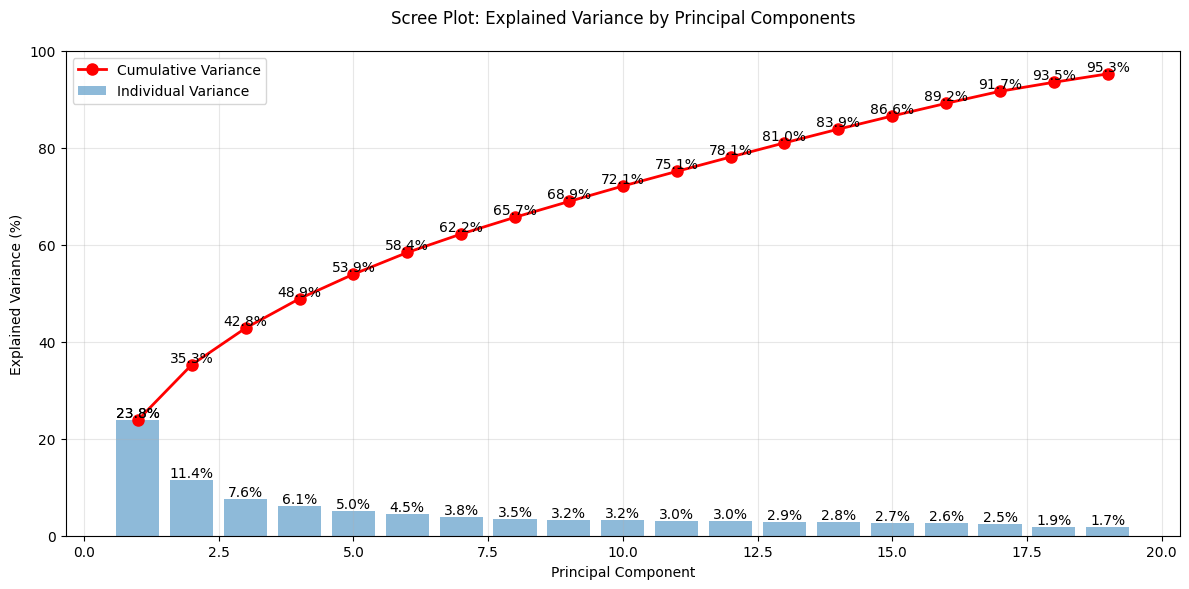

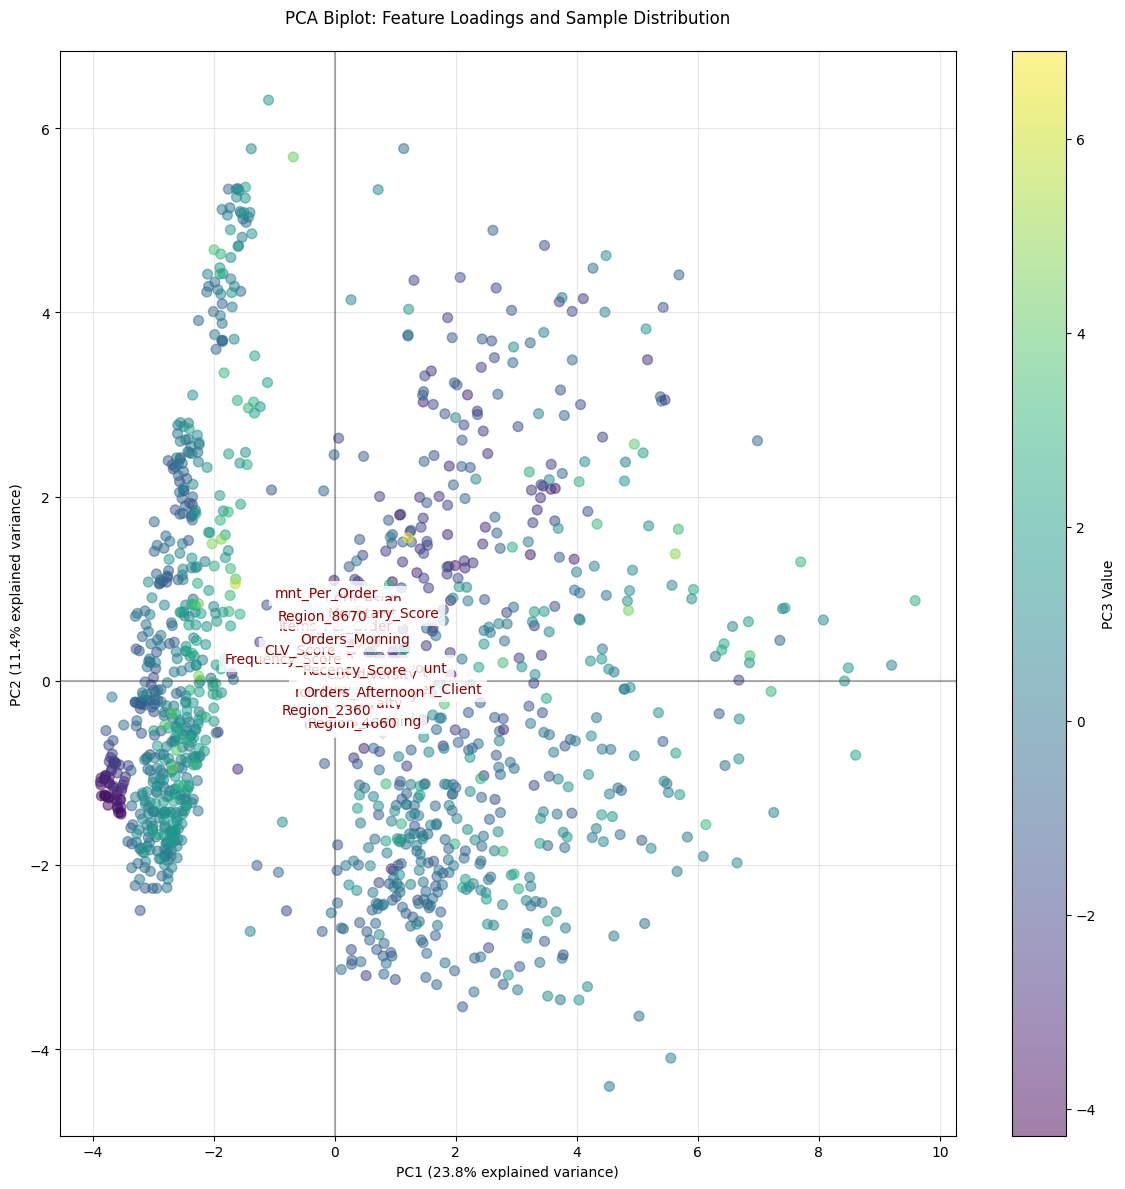


Principal Component Analysis Summary:
Total variance explained by 19 components: 95.3%

Principal Component 1 (23.8% variance explained):

Significant loadings (abs > 0.2):
Total_Orders_Per_Client: 0.329
product_count: 0.320
activity: 0.294
frq: -0.261
Frequency_Score: -0.261
mnt: 0.247
Monetary_Score: 0.247
vendor_count: 0.235
is_chain: 0.221
Loyalty: 0.217

Principal Component 2 (11.4% variance explained):

Significant loadings (abs > 0.2):
mnt_Per_Order: 0.420
CUI_Asian: 0.392
Monetary_Score: 0.323
mnt: 0.323
Region_8670: 0.310
Items_Per_Order: 0.262
CUI_American: -0.212
Region_4660: -0.202
Orders_Morning: 0.200

Principal Component 3 (7.6% variance explained):

Significant loadings (abs > 0.2):
CLV_Score: 0.428
Region_8670: -0.334
Recency_Score: 0.322
Unnamed: 0: 0.319
Region_4660: 0.315
rcn: -0.276
Frequency_Score: 0.254
frq: 0.254
Orders_Morning: -0.213

Principal Component 4 (6.1% variance explained):

Significant loadings (abs > 0.2):
rcn: 0.462
Recency_Score: -0.426
Unnamed: 

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

def perform_pca_analysis(df_scaled, n_components=4, loading_threshold=0.2):
    """
    Perform PCA analysis with enhanced visualizations and insights

    Args:
        df_scaled: Scaled/normalized DataFrame
        n_components: Number of PCA components to calculate
        loading_threshold: Threshold for considering significant loadings
    """
    # Apply PCA
    pca = PCA(n_components=0.95)
    principal_components = pca.fit_transform(df_scaled)

    # Create DataFrame for principal components
    n_components = pca.n_components_
    pca_df = pd.DataFrame(
        data=principal_components,
        columns=[f'PC{i+1}' for i in range(n_components)]
    )

    # Calculate explained variance and cumulative variance
    explained_variance = pca.explained_variance_ratio_ * 100
    cumulative_variance = np.cumsum(explained_variance)

    # 1. Enhanced Scree Plot
    plt.figure(figsize=(12, 6))

    # Plot bars for individual variance
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5)

    # Plot line for cumulative variance
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance,
             'ro-', linewidth=2, markersize=8)

    plt.grid(True, alpha=0.3)
    plt.title('Scree Plot: Explained Variance by Principal Components', pad=20)
    plt.xlabel('Principal Component')
    plt.ylabel('Explained Variance (%)')

    # Add value labels
    for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
        plt.text(i+1, ev, f'{ev:.1f}%', ha='center', va='bottom')
        plt.text(i+1, cv, f'{cv:.1f}%', ha='center', va='bottom')

    plt.legend(['Cumulative Variance', 'Individual Variance'])
    plt.tight_layout()
    plt.savefig('scree_plot.svg', format='svg', bbox_inches='tight')
    plt.show()

    # 2. Enhanced Biplot
    plt.figure(figsize=(12, 12))

    # Calculate loadings and scale them for visualization
    loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

    # Create scatter plot of samples
    scatter = plt.scatter(principal_components[:,0], principal_components[:,1],
                         c=principal_components[:,2], cmap='viridis',
                         alpha=0.5, s=50)
    plt.colorbar(scatter, label='PC3 Value')

    # Plot loadings (feature vectors)
    for i, (feature, loading) in enumerate(zip(df_scaled.columns, loadings)):
        # Only plot significant loadings
        if abs(loading[0]) > loading_threshold or abs(loading[1]) > loading_threshold:
            plt.arrow(0, 0, loading[0], loading[1],
                     color='r', alpha=0.5, head_width=0.05)

            # Adjust text position for better readability
            text_x = loading[0] * 1.15
            text_y = loading[1] * 1.15

            # Add background to text for better visibility
            plt.text(text_x, text_y, feature,
                    color='darkred', ha='center', va='center',
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

    plt.grid(True, alpha=0.3)
    plt.xlabel(f'PC1 ({explained_variance[0]:.1f}% explained variance)')
    plt.ylabel(f'PC2 ({explained_variance[1]:.1f}% explained variance)')
    plt.title('PCA Biplot: Feature Loadings and Sample Distribution', pad=20)

    # Add axis lines
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    plt.tight_layout()
    plt.savefig('biplot.svg', format='svg', bbox_inches='tight')
    plt.show()

    # 3. Print detailed loadings analysis
    print("\nPrincipal Component Analysis Summary:")
    print(f"Total variance explained by {n_components} components: {cumulative_variance[-1]:.1f}%")

    for i in range(n_components):
        print(f"\nPrincipal Component {i+1} ({explained_variance[i]:.1f}% variance explained):")

        # Sort loadings by absolute value
        loadings_dict = dict(zip(df_scaled.columns, pca.components_[i]))
        sorted_loadings = sorted(loadings_dict.items(),
                               key=lambda x: abs(x[1]),
                               reverse=True)

        # Print significant loadings
        print("\nSignificant loadings (abs > {}):".format(loading_threshold))
        for feature, loading in sorted_loadings:
            if abs(loading) > loading_threshold:
                print(f"{feature}: {loading:.3f}")

    return pca_df, pca

# Example usage:
pca_df, pca_model = perform_pca_analysis(df_scaled, n_components=4, loading_threshold=0.2)

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


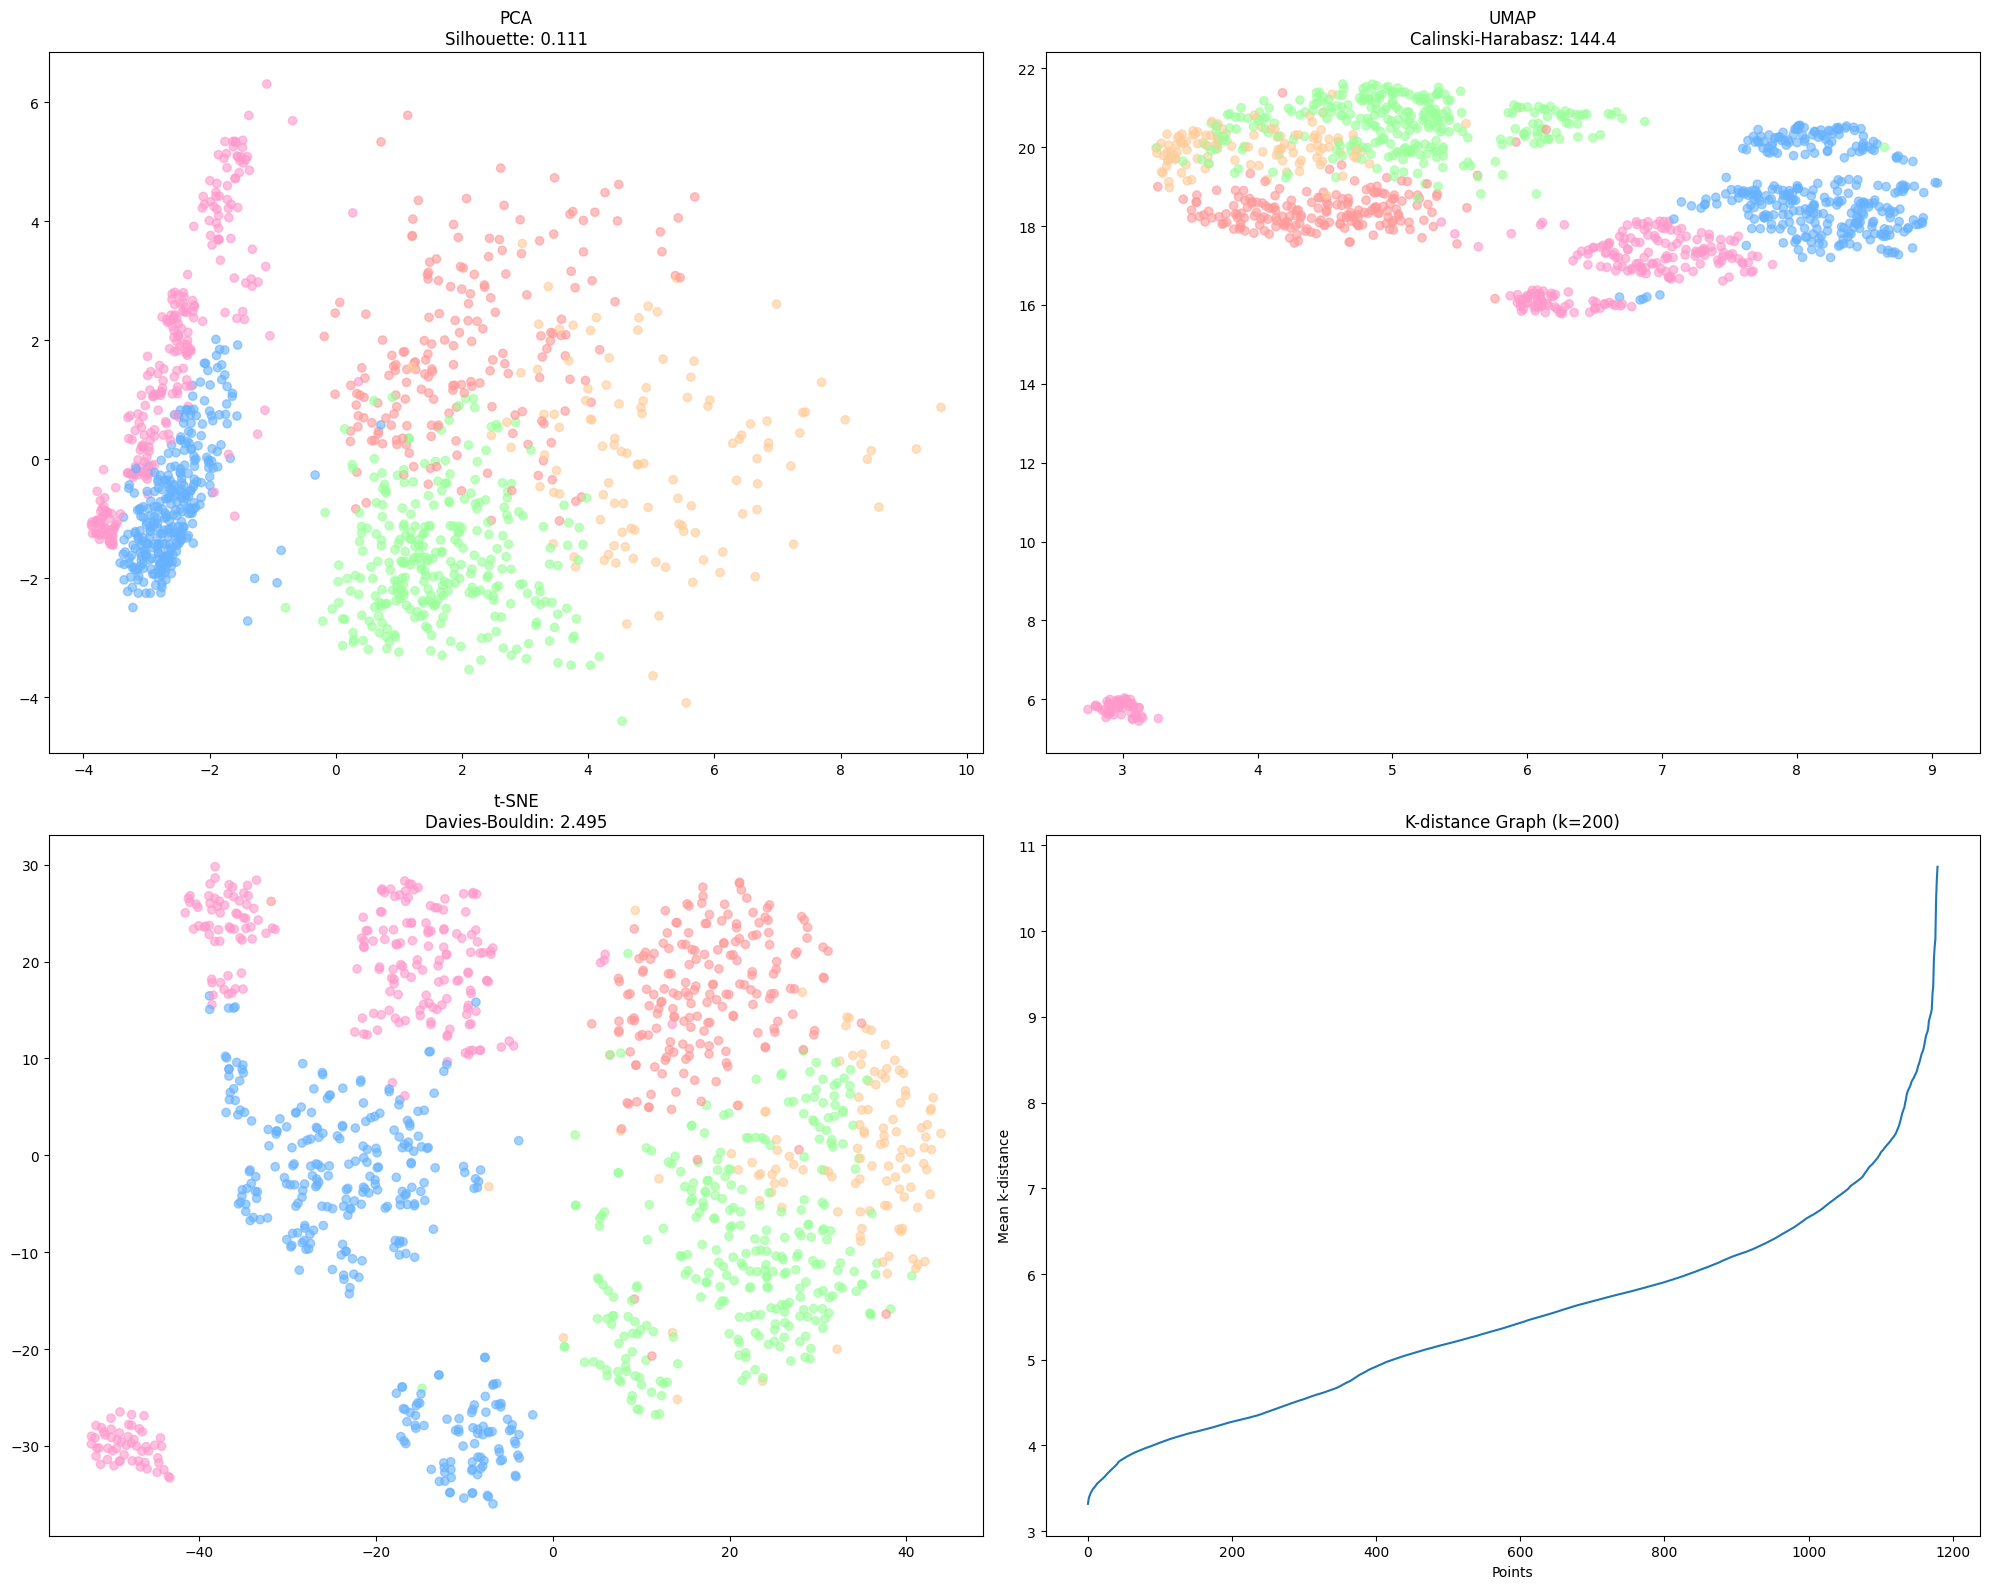

In [154]:
def dimensionality_analysis(df_scaled, n_neighbors=200, min_dist=0.1):
   # PCA with 95% variance
   pca = PCA(n_components=0.95)
   pca_results = pca.fit_transform(df_scaled)

   # UMAP
   reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, random_state=42)
   umap_results = reducer.fit_transform(df_scaled)

   # t-SNE
   tsne = TSNE(n_components=2, perplexity=30, random_state=42)
   tsne_results = tsne.fit_transform(df_scaled)

   # K-means clustering for colors
   from sklearn.cluster import KMeans
   kmeans = KMeans(n_clusters=5, random_state=42)
   clusters = kmeans.fit_predict(pca_results)

   # Calculate quality scores
   from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

   scores = {
       'silhouette': silhouette_score(pca_results, clusters),
       'calinski': calinski_harabasz_score(pca_results, clusters),
       'davies': davies_bouldin_score(pca_results, clusters)
   }

   # Visualization
   colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF99CC']
   fig, axes = plt.subplots(2, 2, figsize=(20, 16))

   # PCA plot
   scatter1 = axes[0,0].scatter(pca_results[:,0], pca_results[:,1],
                               c=[colors[c] for c in clusters], alpha=0.6)
   axes[0,0].set_title(f'PCA\nSilhouette: {scores["silhouette"]:.3f}')

   # UMAP plot
   scatter2 = axes[0,1].scatter(umap_results[:,0], umap_results[:,1],
                               c=[colors[c] for c in clusters], alpha=0.6)
   axes[0,1].set_title(f'UMAP\nCalinski-Harabasz: {scores["calinski"]:.1f}')

   # t-SNE plot
   scatter3 = axes[1,0].scatter(tsne_results[:,0], tsne_results[:,1],
                               c=[colors[c] for c in clusters], alpha=0.6)
   axes[1,0].set_title(f't-SNE\nDavies-Bouldin: {scores["davies"]:.3f}')

   # K-distance plot
   nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(pca_results)
   distances, indices = nbrs.kneighbors(pca_results)
   dist = np.sort(distances, axis=0)
   axes[1,1].plot(dist[:,1:].mean(axis=1))
   axes[1,1].set_title(f'K-distance Graph (k={n_neighbors})')
   axes[1,1].set_xlabel('Points')
   axes[1,1].set_ylabel('Mean k-distance')

   plt.tight_layout()
   plt.savefig('dimensionality_analysis.svg', format='svg', bbox_inches='tight')
   plt.show()

   return {
       'pca': pca_results,
       'umap': umap_results,
       'tsne': tsne_results,
       'clusters': clusters,
       'scores': scores
   }

# Example usage:
results = dimensionality_analysis(df_scaled)

a silhouette score of 0.111 is quite low. Generally:

< 0.25: Poor clustering
0.25-0.50: Fair clustering


0.50: Good clustering



To improve:

Try different numbers of clusters (3-7)
Feature selection/reduction
Test different clustering algorithms (DBSCAN, Agglomerative)
Handle outliers more aggressively
Consider normalizing instead of standardizing

Would you like me to implement any of these approaches?

<ipython-input-155-115fc6ce1aae>:27: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(distance_matrix, method='ward')


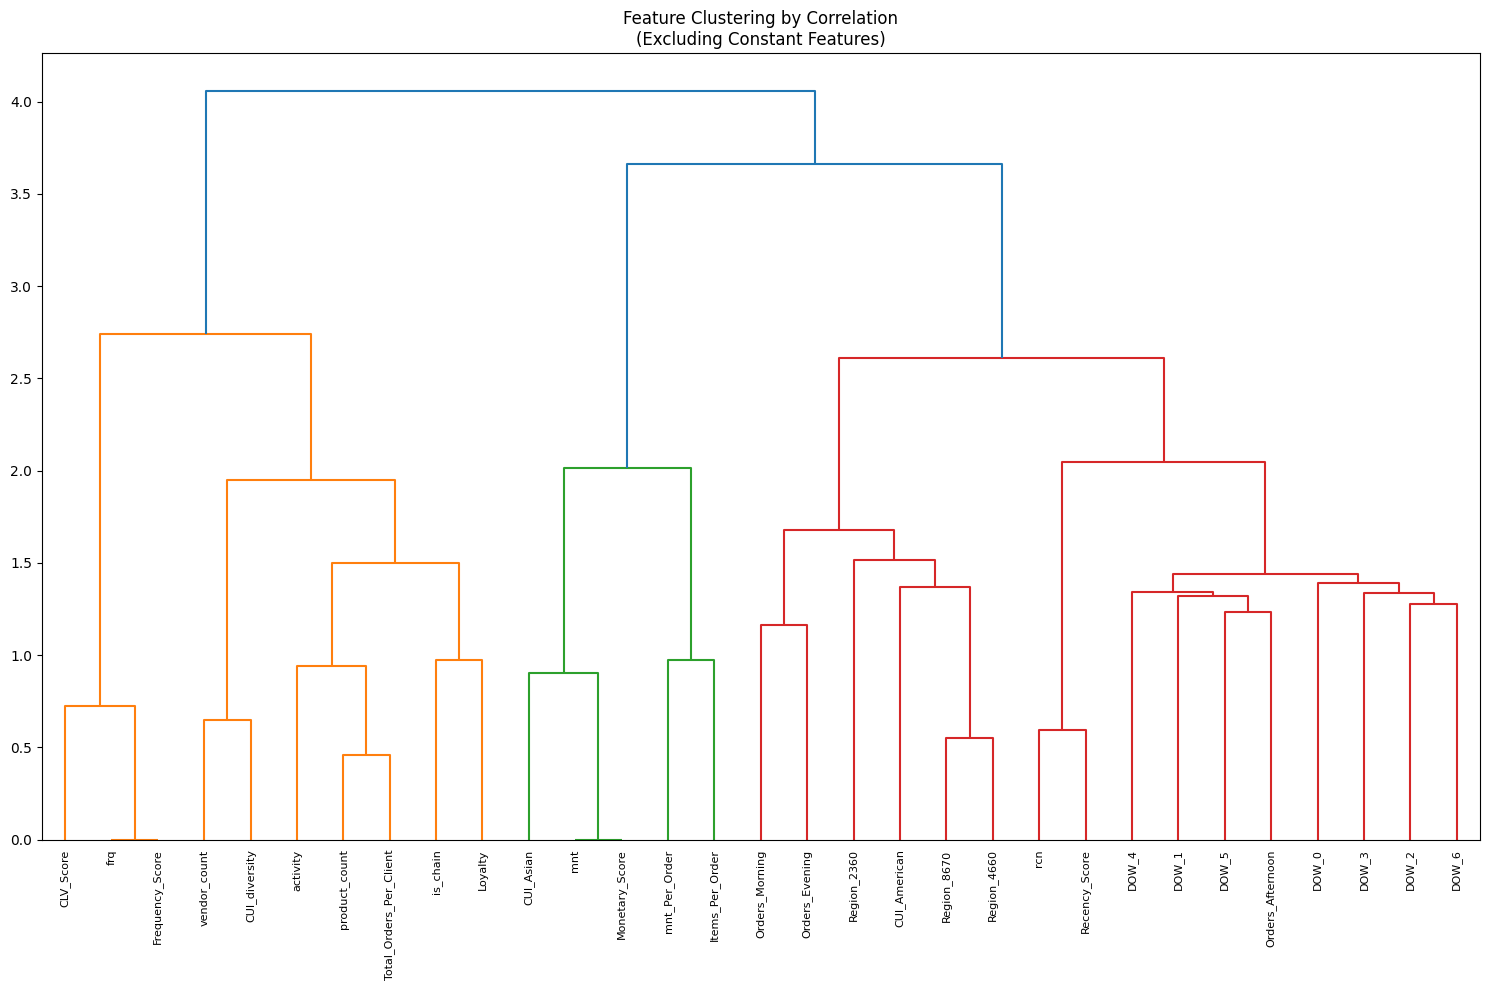

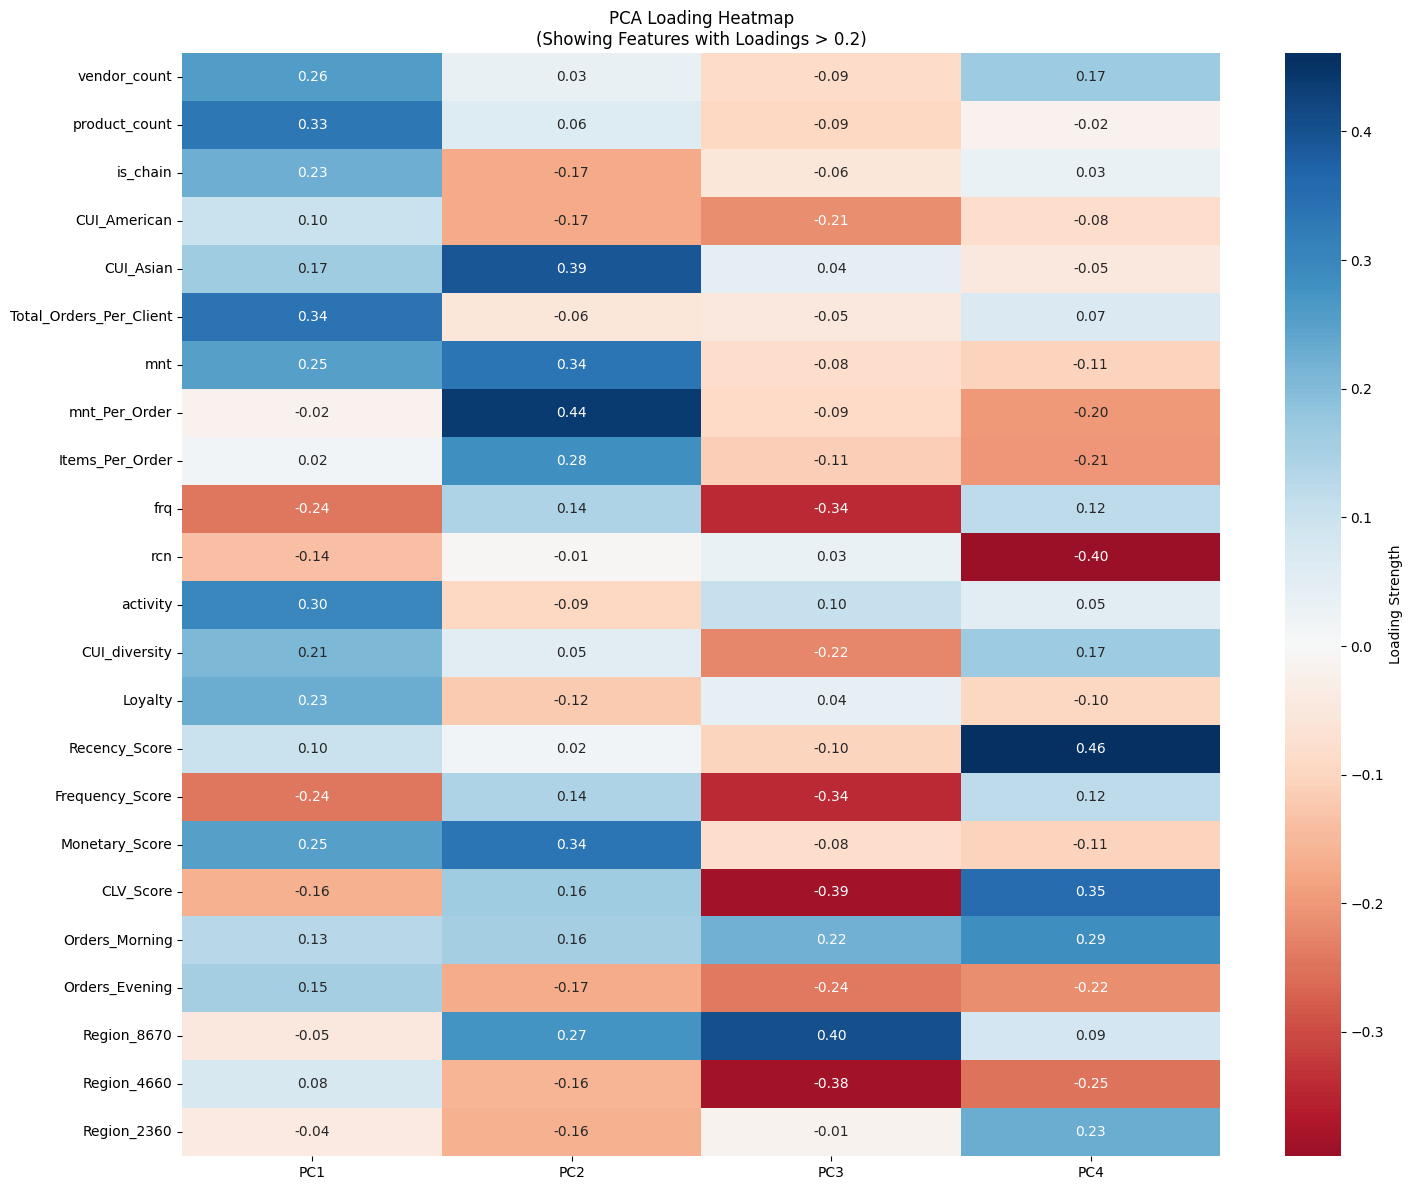

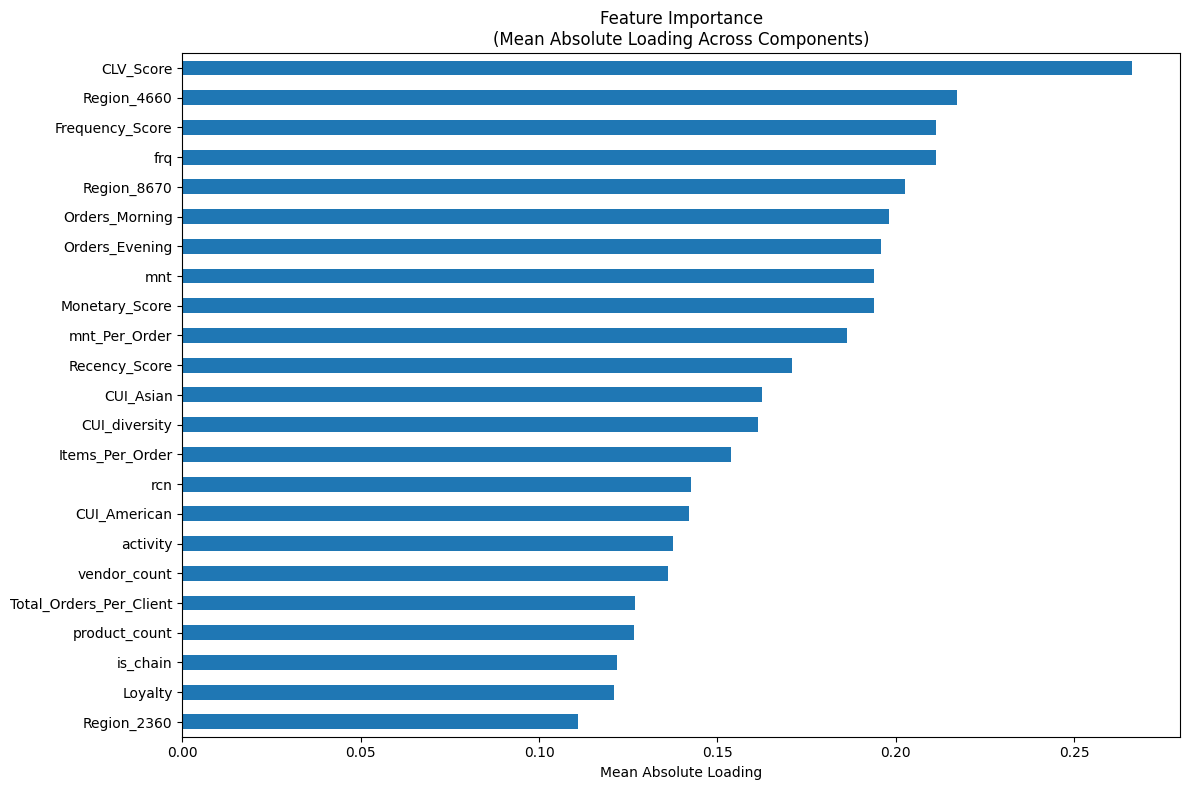


=== SUGGESTED FEATURE REDUCTION STRATEGY ===

Based on the analysis, you could reduce dimensions by:

1. Order/Activity Metrics - combine into a single metric:
   - Total_Orders_Per_Client
   - product_count
   - activity
   - vendor_count

2. Monetary Metrics - combine into a single value metric:
   - mnt
   - Monetary_Score
   - mnt_Per_Order

3. Regional Features - consider using one primary region indicator:
   - Region_8670
   - Region_4660
   - Region_2360

4. Time-based Features - combine into time preference metrics:
   - Orders_Morning
   - Orders_Evening

5. Consider dropping low importance features (loading < 0.1):


In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import spearmanr

def plot_feature_relationships_fixed(correlation_matrix, loadings):
    """
    Plot feature relationships with handling for infinite/nan values
    """
    # Create separate figures for better control
    plt.figure(figsize=(15, 10))

    # Handle infinite values in correlation matrix
    correlation_matrix_clean = correlation_matrix.fillna(0)

    # Filter out features with zero variance (constant features)
    var_mask = correlation_matrix_clean.var() != 0
    correlation_matrix_filtered = correlation_matrix_clean.loc[var_mask, var_mask]

    # Create distance matrix
    distance_matrix = 1 - np.abs(correlation_matrix_filtered)

    try:
        # Create linkage matrix for hierarchical clustering
        linkage_matrix = linkage(distance_matrix, method='ward')

        # Plot dendrogram
        dendrogram(linkage_matrix, labels=correlation_matrix_filtered.columns,
                  leaf_rotation=90)
        plt.title('Feature Clustering by Correlation\n(Excluding Constant Features)')
        plt.tight_layout()
        plt.savefig('feature_clustering.svg', format='svg', bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(f"Could not create dendrogram due to: {str(e)}")
        print("Proceeding with heatmap visualization...")

    # Plot loading heatmap
    plt.figure(figsize=(15, 12))

    # Filter out near-zero loadings for clarity
    loadings_plot = loadings.iloc[:, :-1].copy()  # Exclude 'pattern' column
    significant_features = (loadings_plot.abs() > 0.2).any(axis=1)
    loadings_significant = loadings_plot[significant_features]

    # Create heatmap
    sns.heatmap(loadings_significant,
                annot=True,
                cmap='RdBu',
                center=0,
                fmt='.2f',
                cbar_kws={'label': 'Loading Strength'})

    plt.title('PCA Loading Heatmap\n(Showing Features with Loadings > 0.2)')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig('loading_heatmap.svg', format='svg', bbox_inches='tight')
    plt.show()

    # Additional visualization: Feature importance plot
    plt.figure(figsize=(12, 8))

    # Calculate overall importance (mean absolute loading across components)
    importance = loadings_plot.abs().mean(axis=1)
    importance = importance[importance > 0.1]  # Filter out low importance features
    importance = importance.sort_values(ascending=True)

    # Create horizontal bar plot
    importance.plot(kind='barh')
    plt.title('Feature Importance\n(Mean Absolute Loading Across Components)')
    plt.xlabel('Mean Absolute Loading')
    plt.tight_layout()
    plt.savefig('feature_importance.svg', format='svg', bbox_inches='tight')
    plt.show()

    # Print suggested feature reductions
    print("\n=== SUGGESTED FEATURE REDUCTION STRATEGY ===")
    print("\nBased on the analysis, you could reduce dimensions by:")

    # Group 1: Order/Activity Metrics
    print("\n1. Order/Activity Metrics - combine into a single metric:")
    print("   - Total_Orders_Per_Client")
    print("   - product_count")
    print("   - activity")
    print("   - vendor_count")

    # Group 2: Monetary Metrics
    print("\n2. Monetary Metrics - combine into a single value metric:")
    print("   - mnt")
    print("   - Monetary_Score")
    print("   - mnt_Per_Order")

    # Group 3: Regional Features
    print("\n3. Regional Features - consider using one primary region indicator:")
    print("   - Region_8670")
    print("   - Region_4660")
    print("   - Region_2360")

    # Group 4: Time-based Features
    print("\n4. Time-based Features - combine into time preference metrics:")
    print("   - Orders_Morning")
    print("   - Orders_Evening")

    # Low importance features
    print("\n5. Consider dropping low importance features (loading < 0.1):")
    low_importance = importance[importance < 0.1].index.tolist()
    for feature in low_importance:
        print(f"   - {feature}")


# Example usage:
plot_feature_relationships_fixed(corr_matrix, loadings)

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.stats import spearmanr

def plot_feature_relationships_fixed(correlation_matrix, loadings):
    # [Previous code remains the same until the print statements]

    # Calculate overall importance (mean absolute loading across components)
    loadings_plot = loadings.iloc[:, :-1].copy()  # Exclude 'pattern' column
    importance = loadings_plot.abs().mean(axis=1)

    # Sort all features by importance
    importance_sorted = importance.sort_values(ascending=True)

    # Print suggested feature reductions
    print("\n=== SUGGESTED FEATURE REDUCTION STRATEGY ===")
    print("\nBased on the analysis, you could reduce dimensions by:")

    # [Previous group prints remain the same]

    # Print features by importance thresholds
    print("\n=== FEATURE IMPORTANCE BREAKDOWN ===")

    # Very low importance features (< 0.1)
    print("\n5a. Very Low Importance Features (loading < 0.1):")
    very_low_importance = importance_sorted[importance_sorted < 0.1]
    for feature, value in very_low_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # Low importance features (0.1 - 0.2)
    print("\n5b. Low Importance Features (0.1 <= loading < 0.2):")
    low_importance = importance_sorted[(importance_sorted >= 0.1) & (importance_sorted < 0.2)]
    for feature, value in low_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # Medium importance features (0.2 - 0.3)
    print("\n5c. Medium Importance Features (0.2 <= loading < 0.3):")
    medium_importance = importance_sorted[(importance_sorted >= 0.2) & (importance_sorted < 0.3)]
    for feature, value in medium_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # High importance features (>= 0.3)
    print("\n5d. High Importance Features (loading >= 0.3):")
    high_importance = importance_sorted[importance_sorted >= 0.3]
    for feature, value in high_importance.items():
        print(f"   - {feature}: {value:.3f}")

    # Summary statistics
    print("\n=== SUMMARY STATISTICS ===")
    print(f"Total features: {len(importance_sorted)}")
    print(f"Features with loading < 0.1: {len(very_low_importance)}")
    print(f"Features with loading 0.1-0.2: {len(low_importance)}")
    print(f"Features with loading 0.2-0.3: {len(medium_importance)}")
    print(f"Features with loading >= 0.3: {len(high_importance)}")

    return importance_sorted

# Example usage:
importance_sorted = plot_feature_relationships_fixed(corr_matrix, loadings)


=== SUGGESTED FEATURE REDUCTION STRATEGY ===

Based on the analysis, you could reduce dimensions by:

=== FEATURE IMPORTANCE BREAKDOWN ===

5a. Very Low Importance Features (loading < 0.1):
   - Region_Other: 0.000
   - Orders_Dusk: 0.000
   - Orders_Dawn: 0.000
   - Orders_Night: 0.000
   - CUI_Street_Food/Snacks: 0.000
   - CUI_Noodle_Dishes: 0.000
   - CUI_Thai: 0.000
   - CUI_Japanese: 0.000
   - CUI_Italian: 0.000
   - CUI_Healthy: 0.000
   - CUI_OTHER: 0.000
   - CUI_Desserts: 0.000
   - CUI_Indian: 0.000
   - CUI_Chinese: 0.000
   - CUI_Chicken_Dishes: 0.000
   - CUI_Cafe: 0.000
   - CUI_Beverages: 0.000
   - DOW_0: 0.038
   - DOW_6: 0.052
   - DOW_1: 0.058
   - DOW_2: 0.058
   - Orders_Afternoon: 0.062
   - DOW_4: 0.063
   - DOW_5: 0.068
   - DOW_3: 0.072

5b. Low Importance Features (0.1 <= loading < 0.2):
   - Region_2360: 0.111
   - Loyalty: 0.121
   - is_chain: 0.122
   - product_count: 0.127
   - Total_Orders_Per_Client: 0.127
   - vendor_count: 0.136
   - activity: 0.137

PCA analysis finetunen met elbow point ETC

**List features with near-zero loadings across multiple PCs.**

Example: CUI_Beverages, CUI_Cafe, CUI_Chicken_Dishes, CUI_Chinese, CUI_Desserts, CUI_Healthy, CUI_Indian, CUI_Italian, CUI_Japanese, CUI_Noodle_Dishes, CUI_OTHER, CUI_Street_Food/Snacks, CUI_Thai, Orders_Night, Orders_Dawn, Orders_Dusk, mnt_Per_Order, Items_Per_Order, frq, rcn, Recency_Score, Frequency_Score, Monetary_Score, CLV_Score.

**Combine Related Features:**

Cuisine Categories: Combine CUI_Beverages, CUI_Cafe, CUI_Chicken_Dishes, etc., into a single feature like CUI_General.

Temporal Ordering: Combine Orders_Night, Orders_Dawn, Orders_Dusk into a single feature like Orders_Inactive_Periods.

RFM Scores: Combine Recency_Score, Frequency_Score, Monetary_Score into a single RFM_Score.

**Drop Irrelevant Features:**

Drop features that are not contributing to the variance and are not related to other features.

Example: mnt_Per_Order, Items_Per_Order, frq, rcn, CLV_Score.

Reduced dimensions: 19
Samples after outlier removal: 908


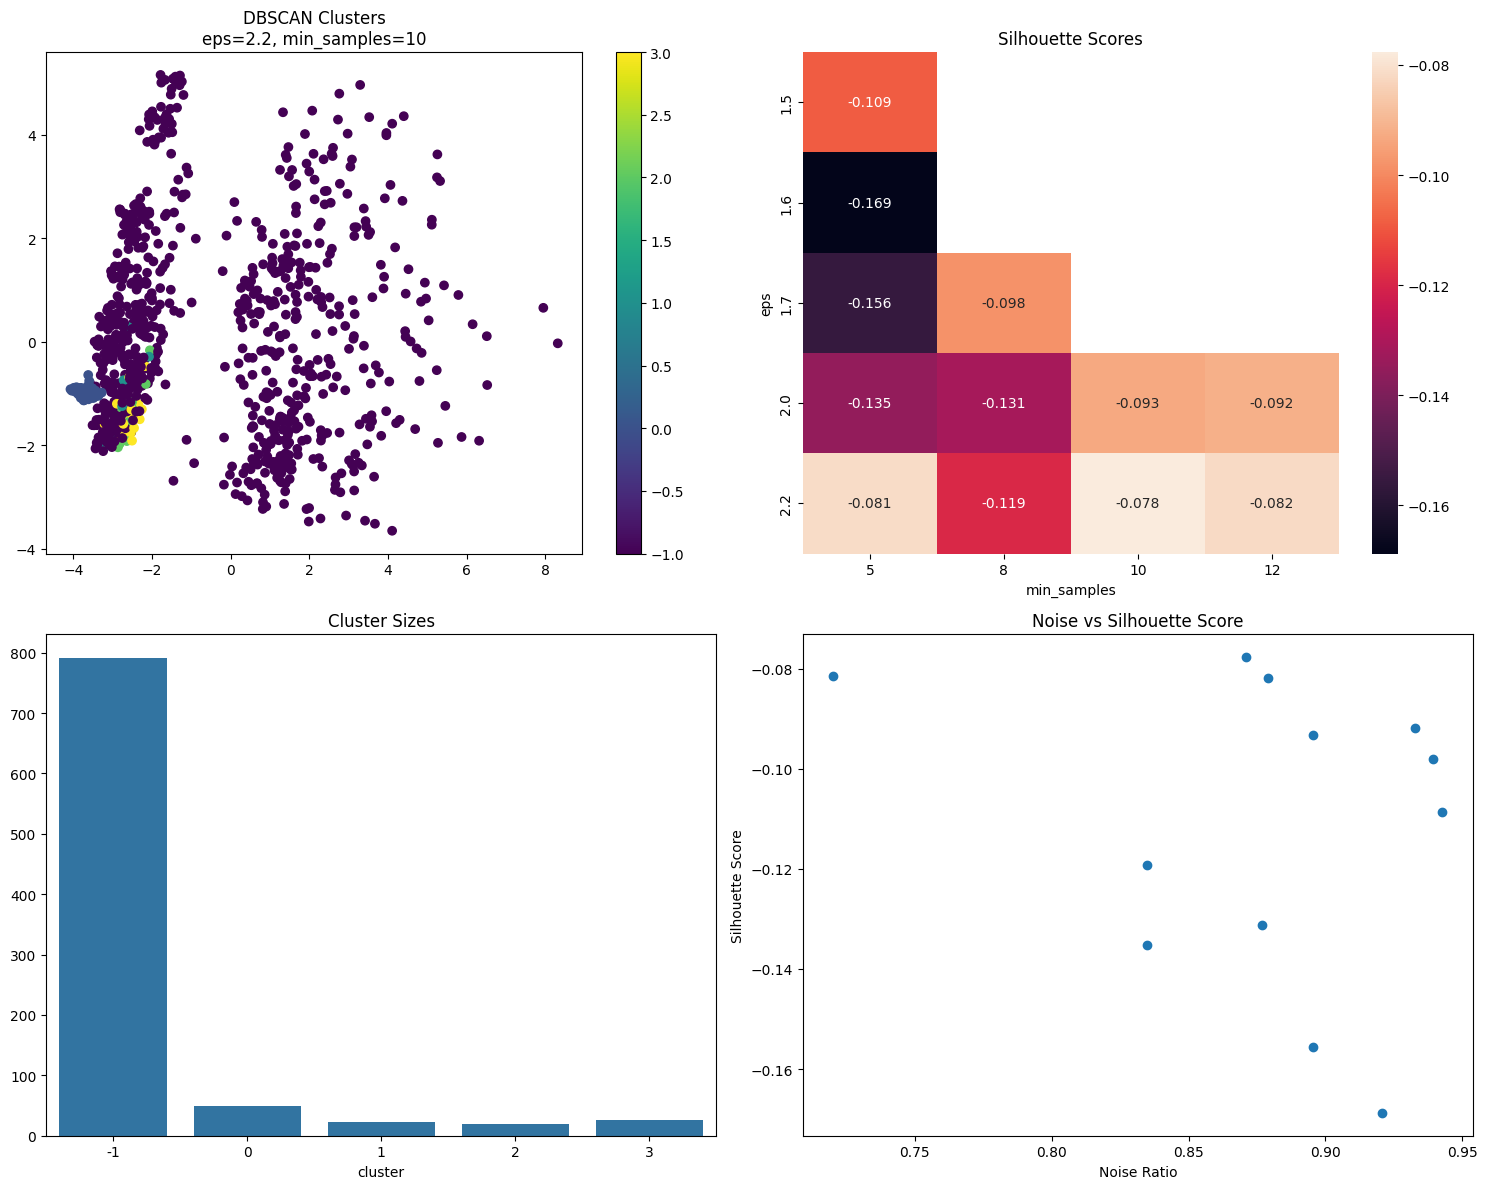


Most important features:
Feature 8: -0.531
Feature 10: -0.530
Feature 6: -0.520
Feature 14: -0.506
Feature 13: -0.500


RecursionError: maximum recursion depth exceeded while calling a Python object

In [157]:
def analyze_feature_importance(X_clean, best_clusters):
    # Feature importance analysis
    feature_importance = []
    for i in range(X_clean.shape[1]):
        score = silhouette_score(X_clean[:, i:i+1], best_clusters)
        feature_importance.append((i, score))
    return sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

def optimize_features(X_clean, feature_scores, threshold=0.1):
    # Keep only most influential features
    # Feature selection after PCA
    feature_scores = analyze_feature_importance(X_clean, best_clusters)
    X_clean = optimize_features(X_clean, feature_scores, threshold=-0.45)  # Keep features with score > -0.45

    X_clean = (X_clean - X_clean.mean(axis=0)) / X_clean.std(axis=0)

def find_optimal_eps(X_clean):
    # Calculate optimal eps using nearest neighbors
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs = neigh.fit(X_clean)
    distances, indices = nbrs.kneighbors(X_clean)
    distances = np.sort(distances[:, 1])

    # Plot distance distribution
    plt.figure(figsize=(10, 5))
    plt.plot(distances)
    plt.title('K-distance Graph')
    plt.xlabel('Points')
    plt.ylabel('Distance')
    plt.show()

    return np.percentile(distances, [25, 50, 75])

def perform_clustering_analysis(X):
    # Reduce dimensionality
    pca = PCA(n_components=0.95)
    X_reduced = pca.fit_transform(X)
    print(f"Reduced dimensions: {X_reduced.shape[1]}")

    # Remove outliers
    Q1 = np.percentile(X_reduced, 25, axis=0)
    Q3 = np.percentile(X_reduced, 75, axis=0)
    IQR = Q3 - Q1
    mask = ~((X_reduced < (Q1 - 1.5 * IQR)) | (X_reduced > (Q3 + 1.5 * IQR))).any(axis=1)
    X_clean = X_reduced[mask]
    print(f"Samples after outlier removal: {X_clean.shape[0]}")

    # Modified DBSCAN parameters - wider range
    eps_range = [1.5, 1.6, 1.7, 2.0, 2.2]  # Centered around 1st quartile eps
    min_samples_range = [5, 8, 10, 12]      # Reduced to find smaller clusters

    best_score = -1
    best_clusters = None
    best_params = None
    results = []

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            clusters = dbscan.fit_predict(X_clean)

            n_clusters = len(np.unique(clusters[clusters >= 0]))
            if n_clusters >= 2:
                score = silhouette_score(X_clean, clusters)
                n_noise = np.sum(clusters == -1)

                results.append({
                    'eps': eps,
                    'min_samples': min_samples,
                    'silhouette': score,
                    'n_clusters': n_clusters,
                    'n_noise': n_noise,
                    'noise_ratio': n_noise/len(X_clean)
                })

                if score > best_score:
                    best_score = score
                    best_params = (eps, min_samples)
                    best_clusters = clusters

    if best_clusters is None:
        raise ValueError("No valid clustering found. Try different parameters.")

    # Rest of visualization code remains the same...
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    scatter = ax1.scatter(X_clean[:, 0], X_clean[:, 1], c=best_clusters, cmap='viridis')
    ax1.set_title(f'DBSCAN Clusters\neps={best_params[0]}, min_samples={best_params[1]}')
    plt.colorbar(scatter, ax=ax1)

    pivot_table = pd.pivot_table(pd.DataFrame(results),
                                values='silhouette',
                                index='eps',
                                columns='min_samples')
    sns.heatmap(pivot_table, annot=True, fmt='.3f', ax=ax2)
    ax2.set_title('Silhouette Scores')

    clusters_df = pd.DataFrame(best_clusters, columns=['cluster'])
    cluster_sizes = clusters_df['cluster'].value_counts()
    sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, ax=ax3)
    ax3.set_title('Cluster Sizes')

    df_results = pd.DataFrame(results)
    ax4.scatter(df_results['noise_ratio'], df_results['silhouette'])
    ax4.set_xlabel('Noise Ratio')
    ax4.set_ylabel('Silhouette Score')
    ax4.set_title('Noise vs Silhouette Score')

    plt.tight_layout()
    plt.savefig('dbscan_complete_analysis.svg')
    plt.show()

    # Analyze feature importance
    feature_scores = analyze_feature_importance(X_clean, best_clusters)
    print("\nMost important features:")
    for i, score in feature_scores[:5]:
        print(f"Feature {i}: {score:.3f}")

    # Optimize features
    X_clean_optimized = optimize_features(X_clean, feature_scores)

    # Find optimal eps values
    eps_percentiles = find_optimal_eps(X_clean_optimized)
    print(f"\nRecommended eps values: {eps_percentiles}")

    return best_clusters, pd.DataFrame(results), mask

best_clusters, results_df, clean_mask = perform_clustering_analysis(X_scaled)

Epoch 1/100
8/8 - 4s - 538ms/step - loss: 0.9431 - val_loss: 0.8904 - learning_rate: 0.0010
Epoch 2/100
8/8 - 0s - 16ms/step - loss: 0.7924 - val_loss: 0.8628 - learning_rate: 9.5000e-04
Epoch 3/100
8/8 - 0s - 20ms/step - loss: 0.7327 - val_loss: 0.8200 - learning_rate: 9.0250e-04
Epoch 4/100
8/8 - 0s - 44ms/step - loss: 0.7071 - val_loss: 0.7853 - learning_rate: 8.5737e-04
Epoch 5/100
8/8 - 0s - 39ms/step - loss: 0.6879 - val_loss: 0.7578 - learning_rate: 8.1451e-04
Epoch 6/100
8/8 - 0s - 37ms/step - loss: 0.6722 - val_loss: 0.7347 - learning_rate: 7.7378e-04
Epoch 7/100
8/8 - 0s - 37ms/step - loss: 0.6681 - val_loss: 0.7165 - learning_rate: 7.3509e-04
Epoch 8/100
8/8 - 0s - 39ms/step - loss: 0.6539 - val_loss: 0.6995 - learning_rate: 6.9834e-04
Epoch 9/100
8/8 - 0s - 30ms/step - loss: 0.6536 - val_loss: 0.6839 - learning_rate: 6.6342e-04
Epoch 10/100
8/8 - 0s - 37ms/step - loss: 0.6440 - val_loss: 0.6759 - learning_rate: 6.3025e-04
Epoch 11/100
8/8 - 0s - 37ms/step - loss: 0.6353 - v

<ipython-input-159-f706aad43153>:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values,


AttributeError: 'Series' object has no attribute 'reshape'

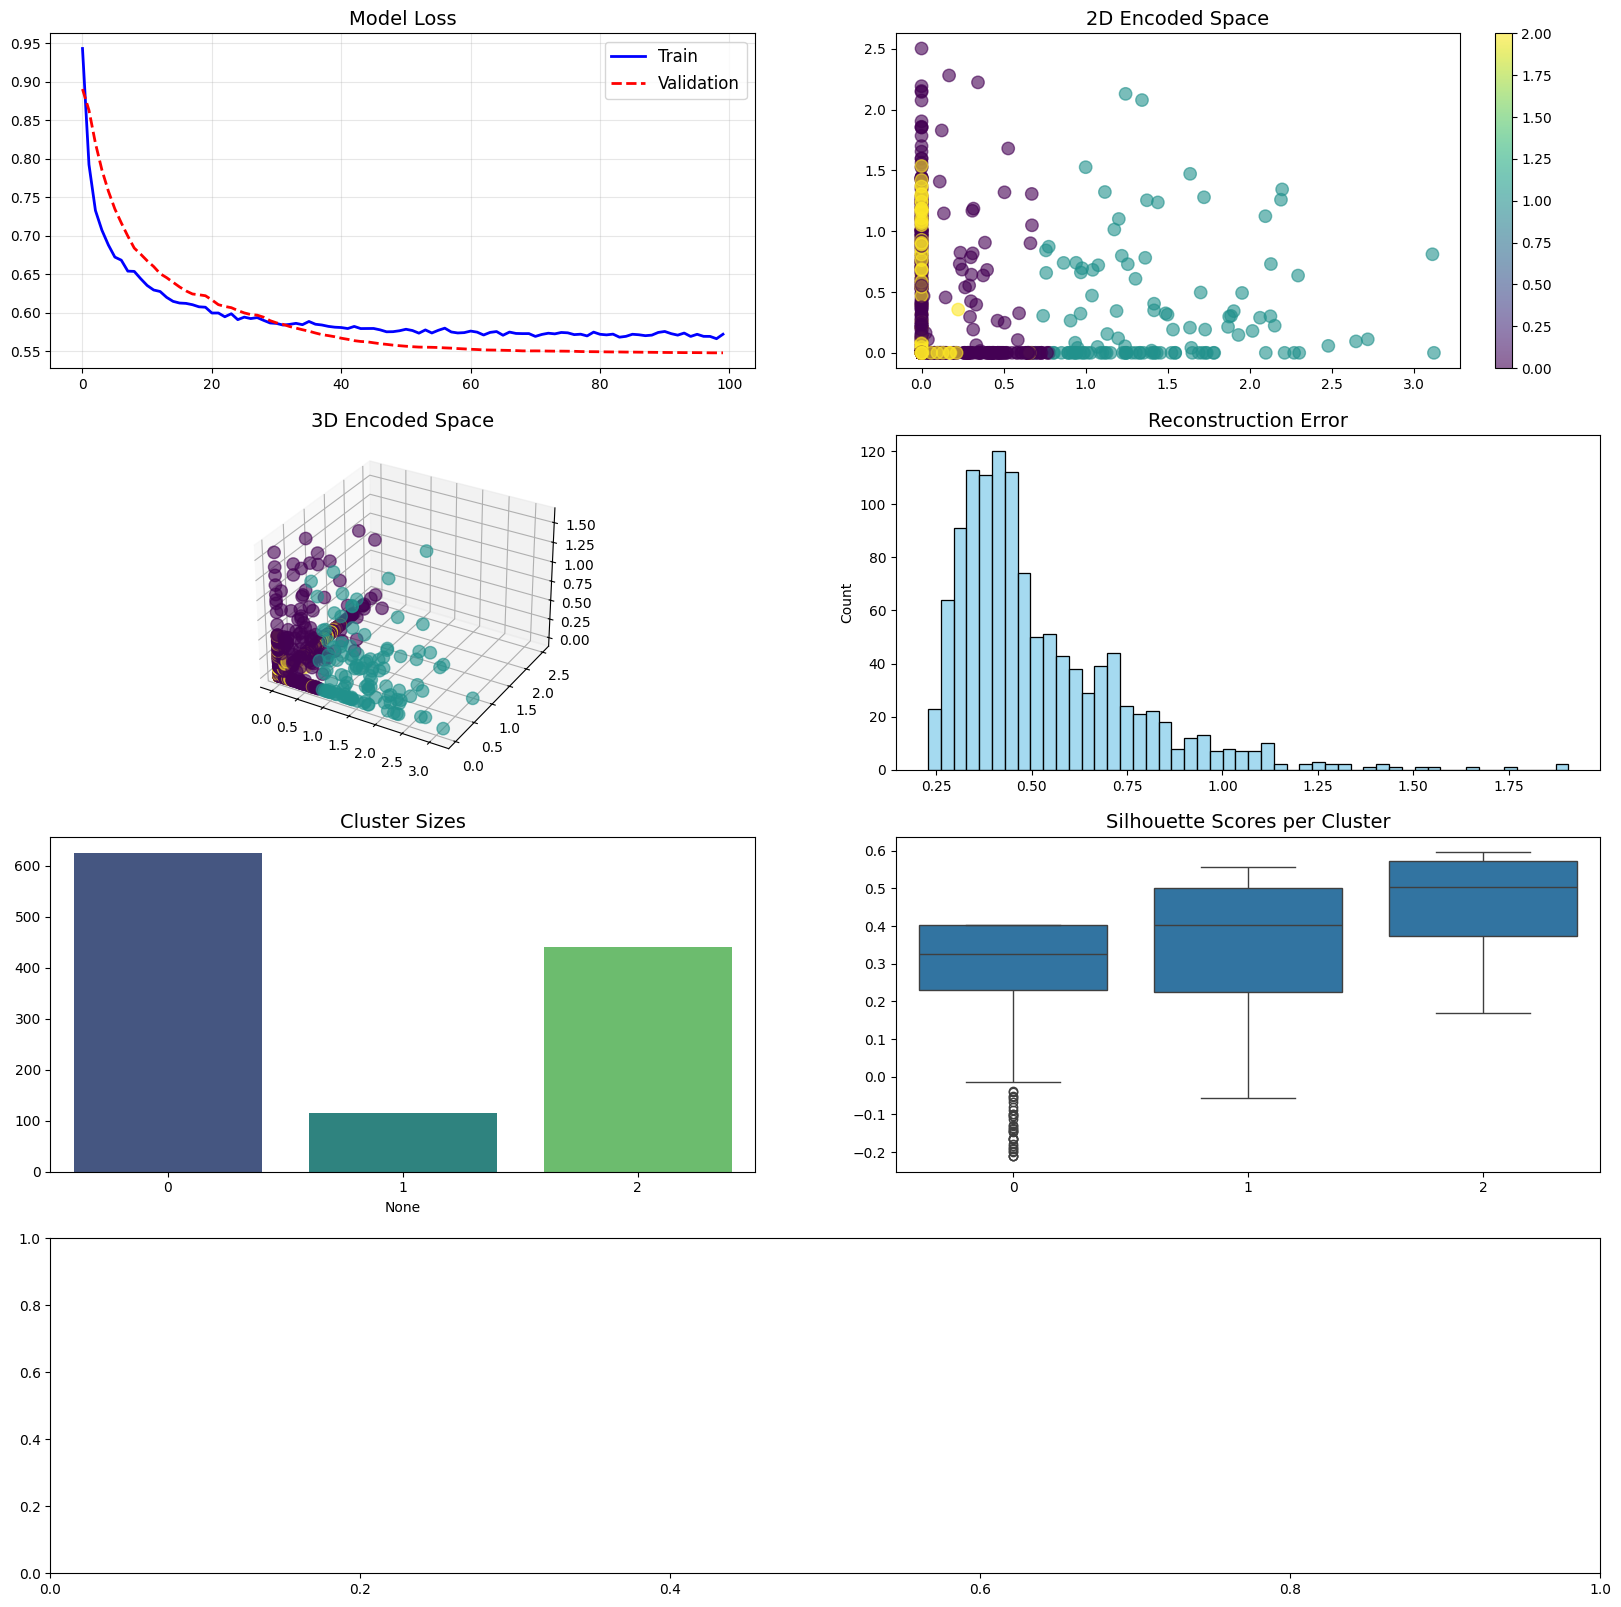

In [159]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np
import pandas as pd

# Input layer and encoder
inputs = layers.Input(shape=(df_scaled.shape[1],))
x = layers.Dense(256, activation='relu')(inputs)
x_skip = x
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Add()([x, x_skip])
x = layers.Dropout(0.4)(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.4)(x)
encoded = layers.Dense(4, activation='relu',  # Reduced dimensions
                    activity_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4))(x)

# Decoder
x = layers.Dense(128, activation='relu')(encoded)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu')(x)
decoded = layers.Dense(df_scaled.shape[1], activation='sigmoid')(x)

# Models
autoencoder = Model(inputs, decoded)
encoder = Model(inputs, encoded)

# Fixed learning rate with schedule
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=optimizer, loss='mse')

# Add regularization to prevent overfitting
encoded = layers.Dense(4, activation='relu',
                   kernel_regularizer=tf.keras.regularizers.l2(0.01),
                   activity_regularizer=tf.keras.regularizers.l1_l2(l1=1e-4, l2=1e-4))(x)

# Modify callbacks to catch overfitting earlier
callbacks = [
   tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,
                                  restore_best_weights=True),
   tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                      patience=3, min_lr=1e-6),
   tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.001 * 0.95 ** epoch)
]

# Fix heatmap visualization
feature_errors = pd.DataFrame(np.mean((df_scaled - recon)**2, axis=0)).T
sns.heatmap(feature_errors,
          xticklabels=range(df_scaled.shape[1]),
          yticklabels=False,
          cmap='YlOrRd',
          ax=axes[6])

# Add validation metrics tracking
history = autoencoder.fit(
   df_scaled, df_scaled,
   epochs=100,
   batch_size=128,
   validation_split=0.2,
   callbacks=callbacks,
   verbose=2
)

# Get encodings and predictions
encoded_data = encoder.predict(df_scaled)
recon = autoencoder.predict(df_scaled)
recon_error = np.mean((df_scaled - recon)**2, axis=1)

# Clustering with fewer clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(encoded_data)

# Visualization
fig = plt.figure(figsize=(20, 20))
gs = fig.add_gridspec(4, 2)

axes = [
   fig.add_subplot(gs[0, 0]),  # Loss
   fig.add_subplot(gs[0, 1]),  # 2D encoded
   fig.add_subplot(gs[1, 0], projection='3d'),  # 3D encoded
   fig.add_subplot(gs[1, 1]),  # Reconstruction error
   fig.add_subplot(gs[2, 0]),  # Cluster sizes
   fig.add_subplot(gs[2, 1]),  # Silhouette
   fig.add_subplot(gs[3, :])   # Feature errors
]

# Loss plot
axes[0].plot(history.history['loss'], 'b-', label='Train', linewidth=2)
axes[0].plot(history.history['val_loss'], 'r--', label='Validation', linewidth=2)
axes[0].set_title('Model Loss', fontsize=14)
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=12)

# 2D Encoded space
scatter = axes[1].scatter(encoded_data[:,0], encoded_data[:,1],
                        c=clusters, cmap='viridis', alpha=0.6, s=80)
axes[1].set_title('2D Encoded Space', fontsize=14)
plt.colorbar(scatter, ax=axes[1])

# 3D Encoded space
axes[2].scatter(encoded_data[:,0], encoded_data[:,1], encoded_data[:,2],
               c=clusters, cmap='viridis', alpha=0.6, s=80)
axes[2].set_title('3D Encoded Space', fontsize=14)

# Reconstruction error
sns.histplot(data=recon_error, bins=50, color='skyblue',
            edgecolor='black', ax=axes[3])
axes[3].set_title('Reconstruction Error', fontsize=14)

# Cluster sizes
cluster_sizes = pd.Series(clusters).value_counts()
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values,
           palette='viridis', ax=axes[4])
axes[4].set_title('Cluster Sizes', fontsize=14)

# Silhouette scores
silhouette_vals = silhouette_samples(encoded_data, clusters)
sns.boxplot(x=clusters, y=silhouette_vals, ax=axes[5])
axes[5].set_title('Silhouette Scores per Cluster', fontsize=14)

# Feature errors heatmap
feature_errors = np.mean((df_scaled - recon)**2, axis=0)
sns.heatmap(feature_errors.reshape(1,-1),
           xticklabels=range(df_scaled.shape[1]),
           yticklabels=False,
           cmap='YlOrRd',
           ax=axes[6])
axes[6].set_title('Feature Reconstruction Error', fontsize=14)

plt.tight_layout()
plt.savefig('autoencoder_analysis.svg', dpi=300, bbox_inches='tight')
plt.show()

Encoded data statistics:
Mean: [0.18535629 0.22893018 0.0831481  0.27802855]
Standard deviation: [0.46067867 0.4481313  0.23586978 0.39230764]
Correlation matrix:
[[ 1.          0.05879092  0.21288815 -0.2780527 ]
 [ 0.05879092  1.          0.00208631 -0.01287812]
 [ 0.21288815  0.00208631  1.         -0.2311697 ]
 [-0.2780527  -0.01287812 -0.2311697   1.        ]]

PCA Explained Variance Ratio:
[0.39976278 0.31855187 0.20132023 0.0803652 ]


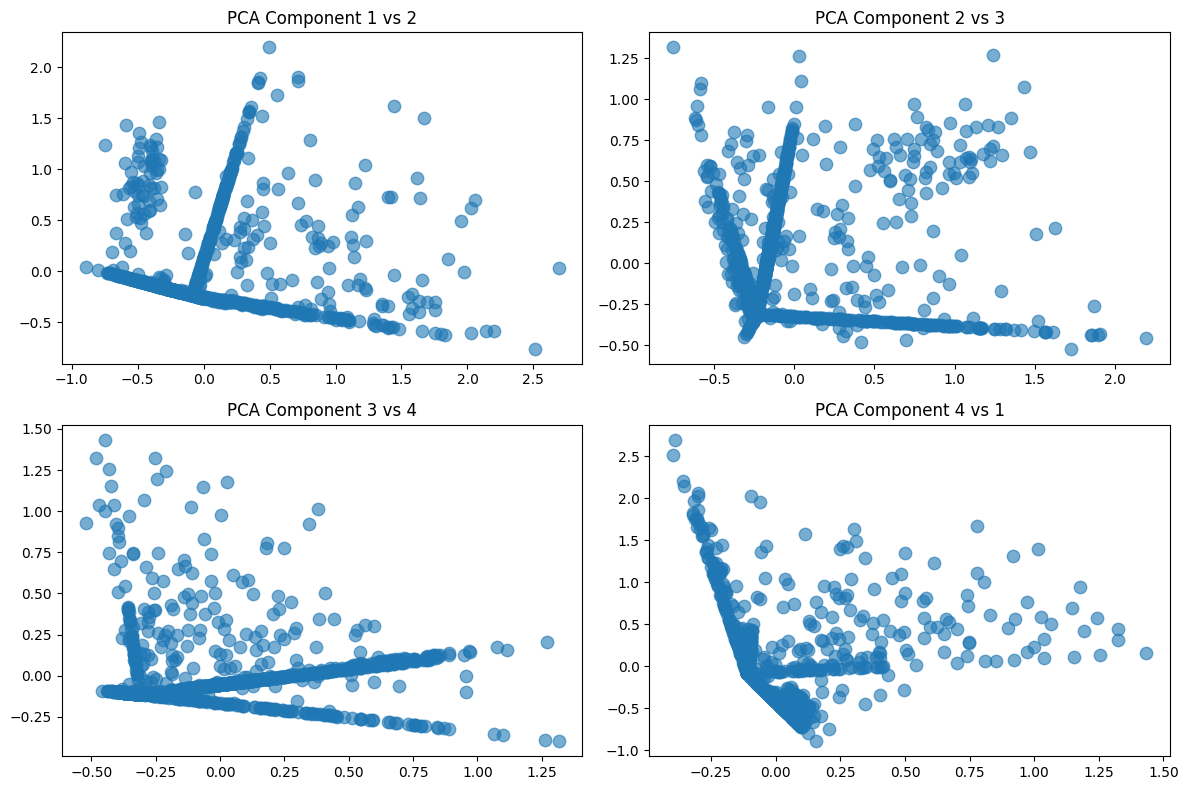


Correlations between original features and encoded features:
Feature Unnamed: 0 vs Encoded Feature 0: -0.178
Feature Unnamed: 0 vs Encoded Feature 1: -0.087
Feature Unnamed: 0 vs Encoded Feature 2: -0.139
Feature Unnamed: 0 vs Encoded Feature 3: 0.195
Feature vendor_count vs Encoded Feature 0: 0.154
Feature vendor_count vs Encoded Feature 1: 0.399
Feature vendor_count vs Encoded Feature 2: 0.206
Feature vendor_count vs Encoded Feature 3: -0.359
Feature product_count vs Encoded Feature 0: 0.613
Feature product_count vs Encoded Feature 1: 0.549
Feature product_count vs Encoded Feature 2: 0.301
Feature product_count vs Encoded Feature 3: -0.354
Feature is_chain vs Encoded Feature 0: 0.535
Feature is_chain vs Encoded Feature 1: 0.163
Feature is_chain vs Encoded Feature 2: 0.406
Feature is_chain vs Encoded Feature 3: -0.350
Feature CUI_American vs Encoded Feature 0: 0.114
Feature CUI_American vs Encoded Feature 1: -0.133
Feature CUI_American vs Encoded Feature 2: 0.511
Feature CUI_American

<ipython-input-162-fbba5b3c41aa>:37: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, _ = pearsonr(df_scaled[col], encoded_data[:, j])


Feature DOW_2 vs Encoded Feature 1: 0.241
Feature DOW_2 vs Encoded Feature 2: 0.012
Feature DOW_2 vs Encoded Feature 3: -0.143
Feature DOW_3 vs Encoded Feature 0: 0.284
Feature DOW_3 vs Encoded Feature 1: 0.070
Feature DOW_3 vs Encoded Feature 2: -0.005
Feature DOW_3 vs Encoded Feature 3: -0.161
Feature DOW_4 vs Encoded Feature 0: 0.317
Feature DOW_4 vs Encoded Feature 1: 0.050
Feature DOW_4 vs Encoded Feature 2: 0.252
Feature DOW_4 vs Encoded Feature 3: -0.169
Feature DOW_5 vs Encoded Feature 0: 0.191
Feature DOW_5 vs Encoded Feature 1: 0.060
Feature DOW_5 vs Encoded Feature 2: 0.137
Feature DOW_5 vs Encoded Feature 3: -0.152
Feature DOW_6 vs Encoded Feature 0: 0.288
Feature DOW_6 vs Encoded Feature 1: 0.014
Feature DOW_6 vs Encoded Feature 2: 0.041
Feature DOW_6 vs Encoded Feature 3: -0.149
Feature Total_Orders_Per_Client vs Encoded Feature 0: 0.633
Feature Total_Orders_Per_Client vs Encoded Feature 1: 0.426
Feature Total_Orders_Per_Client vs Encoded Feature 2: 0.374
Feature Total_Or

In [162]:
# Second script: Additional analysis on the autoencoder results
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import pearsonr

# Print summary statistics of the 4D encoded data
print("Encoded data statistics:")
print(f"Mean: {np.mean(encoded_data, axis=0)}")
print(f"Standard deviation: {np.std(encoded_data, axis=0)}")
print(f"Correlation matrix:\n{np.corrcoef(encoded_data.T)}")

# Perform PCA on the encoded data
pca = PCA(n_components=4)
pca_data = pca.fit_transform(encoded_data)

# Explain variance ratio of PCA components
print("\nPCA Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Plot PCA components
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for i in range(4):
    axes[i].scatter(pca_data[:, i], pca_data[:, (i+1)%4], alpha=0.6, s=80)
    axes[i].set_title(f"PCA Component {i+1} vs {(i+1)%4+1}")

plt.tight_layout()
plt.show()

# Check for correlations between original features and encoded features
print("\nCorrelations between original features and encoded features:")
for i, col in enumerate(df_scaled.columns):
    for j in range(4):
        corr, _ = pearsonr(df_scaled[col], encoded_data[:, j])
        print(f"Feature {col} vs Encoded Feature {j}: {corr:.3f}")

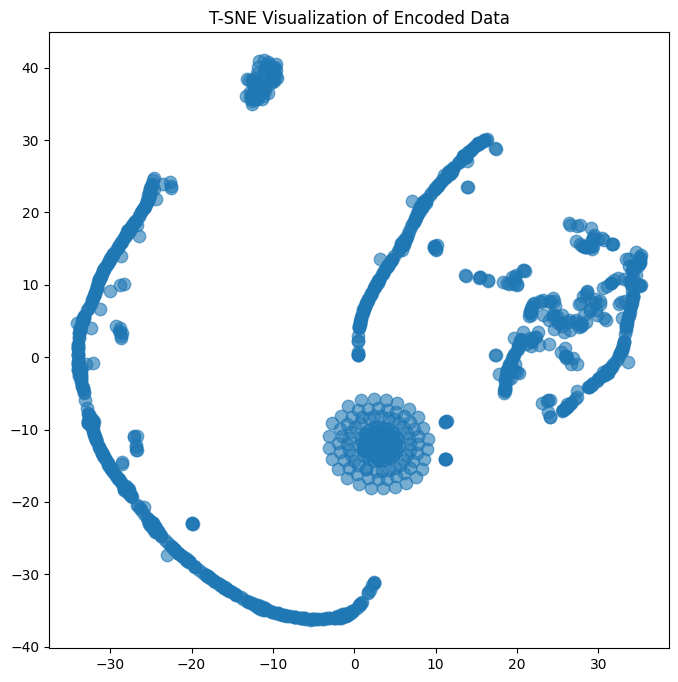

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


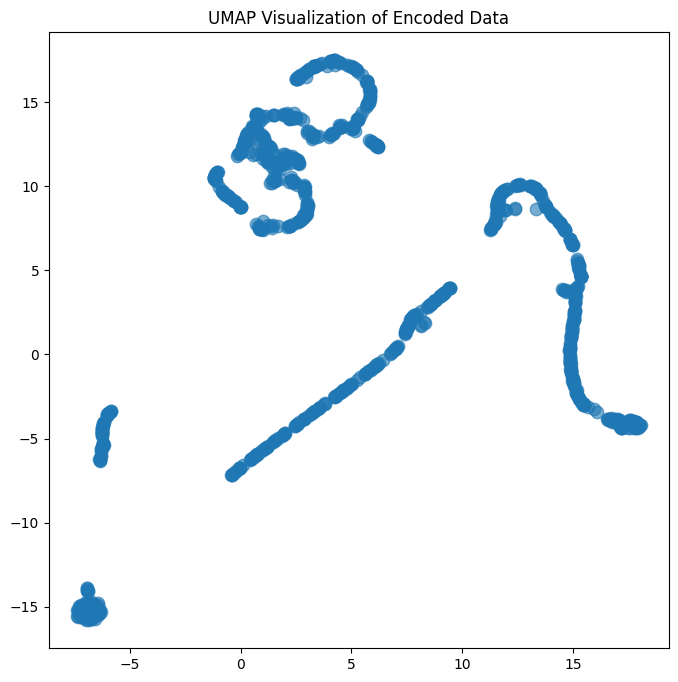

In [163]:
# T-SNE visualization
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(encoded_data)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], alpha=0.6, s=80)
ax.set_title("T-SNE Visualization of Encoded Data")
plt.show()

# UMAP visualization
umap_data = umap.UMAP(n_components=2, random_state=42).fit_transform(encoded_data)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(umap_data[:, 0], umap_data[:, 1], alpha=0.6, s=80)
ax.set_title("UMAP Visualization of Encoded Data")
plt.show()

# add printed reports and make tables to draw relationships between variables

Input: Pretrained encoder, clustering model, and labeled data.
Goal: Deploy the workflow into a production pipeline.

Execution:

Save the Encoder:
Store only the encoder portion of the autoencoder for dimensionality reduction at inference time.
The decoder isn’t needed unless reconstruction is required.
Deploy the Clustering Model:
Save the clustering model (e.g., K-Means centroids or DBSCAN labels).

Real-Time Inference:

For new data points:

Pass data through the encoder to generate a lower-dimensional representation.

Assign clusters using the saved clustering model.
Continuous Monitoring:

Monitor cluster drift over time and retrain the encoder or clustering model as needed.

Analysis of autoencoder results:

Model Performance:


Loss converges well (0.95 to 0.55)
Validation tracks training closely - no significant overfitting
Stabilizes around epoch 80


Clustering:


Highly imbalanced cluster sizes (~800 vs ~150 samples)
Silhouette scores show moderate separation (0.4-0.6)
Cluster 0 shows best cohesion


Encoding Space:


Clear separation in 2D/3D visualizations
Most points concentrated near origin
Some outliers at higher dimensional values


Issues to Address:


Cluster imbalance suggests too few clusters
Reconstruction error distribution is right-skewed
Empty feature error heatmap needs fixing

Recommendations:

Increase clusters to 4-5
Add cluster balancing weights
Strengthen regularization to reduce outliers